https://mp.weixin.qq.com/s?__biz=MzI0NTQ1NDc4Nw==&mid=2247485429&idx=1&sn=927e4956e39587151a7074a0a01384f5&chksm=e94f0559de388c4f70dd822d97fed9315a8929c27bf962101599c5acf5b2672b979651177317&scene=21#wechat_redirect

In [1]:
# 导入模块并设置日志记录
import gensim, logging
from pprint import pprint
from smart_open import smart_open
import os
import jieba

# jieba.load_userdict(r"G:\chinese-opinion-target-extraction-master\dataset\dictionary\dictionary.txt")  #
# 载入自定义词典，提高分词的准确性,因为数据量较大，需要花点时间加载
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
sentences = [
    
'2018年10月份，麻省理工学院的Zakaria el Hjouji, D. Scott Hunter等学者发表了《The Impact of Bots on Opinions in Social Networks》，',
'该研究通过分析 Twitter 上的机器人在舆论事件中的表现，证实了社交网络机器人可以对社交网络舆论产生很大的影响，不到消费者总数1%的活跃机器人，就可能左右整个舆论风向。',
'麻省理工学院研究组的这项工作，最大的发现是，影响社交网络舆论所需要的机器人，其实是很少的。少数活跃的机器人，可以对网络舆论产生重大影响。',
'机器人检测算法，会判断某用户是机器人的概率，但实际操作中研究者发现，该算法把几个经常转发但不常被@ 的真实用户也当做了机器人。所以研究者对有实名认证的 Twitter 用户做了筛查，把他们都归为真实用户。',
'不论是真实的推特用户还是推特机器人，它们的三个基本操作是，关注、转发和评论（类似微博）。通过跟踪这些互动，研究者可以有效量化 Twitter 账号的行为。',
'直觉上，那些不太关注别人的用户，也不太可能关注你。而且社交圈子重叠很重要，如果 A 和 B 是好友，那么关注 A 的用户就有较大概率关注 B。',
'虽然人们在收到新信息时会更新他们的观点，但这个过程会随着时间的推移而减弱，他们的观点会逐渐变得顽固。Zaman 认为，如果你已经掌握了很多信息，你就越来越难听从别人的观点，新说法不会改变你的看法。',
'该研究团队基于过往研究，给出了网络舆论模型的核心假设：',
'社交网络中的个人是基于其朋友推文中的观点，来更新自身的观点；',
'网络中某些用户的观点是顽固的，其观点不会轻易改变，而且顽固用户会推动其他用户（摇摆不定的中间派）改变观点。',
'虽然社交媒体机器人不会带来物理威胁，但它们却可能有力影响到网络舆论。在微博里，各类水军已经经常出现在营销造势、危机公关中。虽然你能一眼识别出谁是水军，但仍然可能不知不觉地被他们影响。',
'这些机器人看似僵尸，发起声来，比人类响亮得多，可能只要几十个几百个就足够扭转舆论！',
'所以，从社会化媒体数据挖掘的角度来看，信息的真实性并不重要，只要文章、帖子或者评论能影响到浏览者或受众，具有一定的（潜在）影响力，这类社媒数据数据就值得去挖掘。',
'更进一步说，跟销售数据反映消费者决策价值、搜索数据反映消费者意图价值相比，虽然社会化媒体文本数据的价值密度最低，好比是蕴藏金子和硅、却提炼极为困难的沙子，但由于它在互联网领域的分布极为广泛，',
'且蕴含着对客观世界的细节描述和主观世界的宣泄（情绪、动机、心理等），其最大价值在于潜移默化地操控人的思想和行为的影响力，',
'通过社会化媒体挖掘，我们可以得到对目标受众具有（潜在）影响力的商业情报。淘沙得金，排沙简金，最终得到的分析结果用以预判受众的思考和行为，为我们的生产实践服务。'
          ]

In [3]:

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
sentences = [wordnet_lemmatizer.lemmatize(porter_stemmer.stem(i.lower())) for i  in sentences]

In [4]:

sentences[:2]

['2018年10月份，麻省理工学院的zakaria el hjouji, d. scott hunter等学者发表了《the impact of bots on opinions in social networks》，',
 '该研究通过分析 twitter 上的机器人在舆论事件中的表现，证实了社交网络机器人可以对社交网络舆论产生很大的影响，不到消费者总数1%的活跃机器人，就可能左右整个舆论风向。']

In [5]:

data_cut = [jieba.lcut(i) for i  in sentences] #对语句进行分词data_cut = [' '.join(jieba.lcut(i)) for i  in sentences] #用空格隔开词汇，形成字符串，便于后续的处理stoplist = [i.strip() for i in open('datasets/stopwords_zh.txt',encoding='utf-8').readlines()]  #载入停用词列表sentences = [[word for word in document.strip().split() if word not in stoplist] for document in data_cut]   #过滤语句中的停用词sentences[:3]  #展示预处理后语句列表中的3个样例

Building prefix dict from the default dictionary ...
2020-11-10 21:16:10,144 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
2020-11-10 21:16:10,162 : DEBUG : Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.791 seconds.
2020-11-10 21:16:11,950 : DEBUG : Loading model cost 1.791 seconds.
Prefix dict has been built successfully.
2020-11-10 21:16:11,953 : DEBUG : Prefix dict has been built successfully.


In [6]:
# 在这些语句上训练word2vec模型
model = gensim.models.Word2Vec(sentences,min_count=1)

2020-11-10 21:16:17,829 : INFO : collecting all words and their counts
2020-11-10 21:16:17,833 : WARNING : Each 'sentences' item should be a list of words (usually unicode strings). First item here is instead plain <class 'str'>.
2020-11-10 21:16:17,836 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-10 21:16:17,840 : INFO : collected 370 word types from a corpus of 1167 raw words and 16 sentences
2020-11-10 21:16:17,843 : INFO : Loading a fresh vocabulary
2020-11-10 21:16:17,847 : INFO : effective_min_count=1 retains 370 unique words (100% of original 370, drops 0)
2020-11-10 21:16:17,849 : INFO : effective_min_count=1 leaves 1167 word corpus (100% of original 1167, drops 0)
2020-11-10 21:16:17,857 : INFO : deleting the raw counts dictionary of 370 items
2020-11-10 21:16:17,861 : INFO : sample=0.001 downsamples 90 most-common words
2020-11-10 21:16:17,864 : INFO : downsampling leaves estimated 810 word corpus (69.5% of prior 1167)
2020-11-10 21:16:17

In [12]:
#做一个简单的相似词检索操作，可能是训练语料太少的缘故，得到的结果没有太
model.wv.most_similar('理工')  

KeyError: "word '理工' not in vocabulary"

In [13]:
class MySentences(object):  
  def __init__(self, dirname):    
    self.dirname = dirname  
  def __iter__(self):    
    for fname in os.listdir(self.dirname):      
      #print('正在处理文件{}'.format(fname))      
      for line in smart_open(os.path.join(self.dirname, fname), 'r',encoding='utf-8'):        
        line = line.lower() #对每一行文本中的英文词汇小写化         
        line = wordnet_lemmatizer.lemmatize(porter_stemmer.stem(line))        
        line = line.replace('social listening','social_listening')  #'social_listening'是文本中一个重要的词汇，为了防止因分词问题导致的语义丢失，笔者将其替换成带下划线的单个词汇             
        jieba.add_word('social_listening')  #对特定长词进行控制，防止被分错词，影响后续的分析效果      
        jieba.add_word('社会化聆听')  #对social_listening进行控制，防止被分错词，影响后续的分析效果        
        yield [i.strip() for i in jieba.lcut(line) if i not in stoplist and  len(i) > 1]  #在载入文本的同时，对其中的语句进行分词处理，且去掉停用词和长度小于1的语句

In [14]:

sentences = MySentences('./data/')  # 内存友好的迭代器
print(list(sentences)[:30])   #打印其中的30个文档

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [15]:

# 生成Word2Vec模型
model = gensim.models.Word2Vec(sentences, min_count=3)

2020-11-10 21:18:07,633 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [16]:
print(model)
print(list(model.wv.vocab)[:50])

Word2Vec(vocab=370, size=100, alpha=0.025)
['2', '0', '1', '8', '年', '月', '份', '，', '麻', '省', '理', '工', '学', '院', '的', 'z', 'a', 'k', 'r', 'i', ' ', 'e', 'l', 'h', 'j', 'o', 'u', ',', 'd', '.', 's', 'c', 't', 'n', '等', '者', '发', '表', '了', '《', 'm', 'p', 'f', 'b', 'w', '》', '该', '研', '究', '通']


In [18]:
#  以另一种方式训练模型，使上述两个步骤显式化
new_model = gensim.models.Word2Vec(min_count=2)  # 一个“空”的模型，还未进行实质性的训练
new_model.build_vocab(sentences)                 # 可以是不可重复的，遍历一次语句生成器
new_model.train(sentences, total_examples=new_model.corpus_count, epochs=new_model.iter)   #可以是不可重复的，遍历一次语句生成器

2020-11-10 21:18:28,643 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [19]:

print(new_model)
print(list(model.wv.vocab)[:50])

Word2Vec(vocab=0, size=100, alpha=0.025)
['2', '0', '1', '8', '年', '月', '份', '，', '麻', '省', '理', '工', '学', '院', '的', 'z', 'a', 'k', 'r', 'i', ' ', 'e', 'l', 'h', 'j', 'o', 'u', ',', 'd', '.', 's', 'c', 't', 'n', '等', '者', '发', '表', '了', '《', 'm', 'p', 'f', 'b', 'w', '》', '该', '研', '究', '通']


In [20]:

#  默认的min_count是5
model =  gensim.models.Word2Vec(sentences, min_count=8)

2020-11-10 21:18:45,077 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [21]:

#  默认的size数是100
model = gensim.models.Word2Vec(sentences, size=50)

2020-11-10 21:18:51,831 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-11-10 21:18:51,836 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [22]:
# workers的默认值为3
model = gensim.models.Word2Vec(sentences, workers=7)

2020-11-10 21:18:58,158 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [23]:
#iter的默认值为5 
model = gensim.models.Word2Vec(sentences, iter=20)

2020-11-10 21:19:08,162 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [24]:

#sg的默认值为0,也就是训练的默认模型为CBOW 
model = gensim.models.Word2Vec(sentences, sg=1)

2020-11-10 21:19:13,755 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [25]:

# 模型默认的window数值为5
model = gensim.models.Word2Vec(sentences,  window = 8 )

2020-11-10 21:19:20,139 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [26]:

# 模型默认的window数值为5
model = gensim.models.Word2Vec(sentences,  window = 8 )

2020-11-10 21:19:25,603 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [27]:

from tempfile import mkstemp
temp_path = mkstemp("gensim_temp")  # 创建一个temp文件
model.save(temp_path)  # 保存模型

2020-11-10 21:19:32,866 : INFO : saving Word2Vec object under (4, 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpg5gw3l19gensim_temp'), separately None


AttributeError: 'tuple' object has no attribute 'endswith'

In [28]:

new_model = gensim.models.Word2Vec.load(temp_path)  # 加载模型

2020-11-10 21:19:40,053 : INFO : loading Word2Vec object from (4, 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpg5gw3l19gensim_temp')
2020-11-10 21:19:40,057 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2020-11-10 21:19:40,059 : INFO : loading Word2Vec object from (4, 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpg5gw3l19gensim_temp')


AttributeError: 'tuple' object has no attribute 'endswith'

In [29]:

model = gensim.models.KeyedVectors.load_word2vec_format('/tmp/vectors.txt', binary=False)

2020-11-10 21:19:46,578 : INFO : loading projection weights from /tmp/vectors.txt


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/vectors.txt'

In [30]:

model = gensim.models.KeyedVectors.load_word2vec_format('/tmp/vectors.bin.gz', binary=True)

2020-11-10 21:19:52,650 : INFO : loading projection weights from /tmp/vectors.bin.gz


FileNotFoundError: [Errno 2] No such file or directory: '/tmp/vectors.bin.gz'

In [31]:

model = gensim.models.Word2Vec.load(temp_path)
more_sentences = ['众所周知，社交聆听是一个需要社交媒体聆听/社交媒体监控工具的实现的过程（例如，Awario，Mention，Brandwatch）。',
'打开应用程序时，您要做的第一件事就是输入要监控的关键字。','关键字是最能描述您想要在社交媒体平台和网络上找到的内容的词。',
'关键字可以是一个单词（例如“飞利浦”），两个单词（例如“Aleh Barysevich”），四个单词（例如“搜索引擎优化工具”）等。',
'这些示例中的每一个都呈现一个关键字。输入关键字后，该工具会搜索这些关键字的提及次数并将其收集在一个位置。',
'监控营销（和其他）活动以及产品发布至关重要。',
'社交媒体上的反应非常迅速。只有通过实时监控此类事件，您才会立即知道它是否正常运行以及是否存在您在创建活动时可能没有注意到的问题。',
'你越早知道越好。要监控广告系列，请输入其名称（如果有），标语和/或主题标签作为关键字。'                                  ]
more_sentences = [' '.join(jieba.lcut(i)) for i  in more_sentences]
stoplist = [i.strip() for i in open('datasets/stopwords_zh.txt',encoding='utf-8').readlines()]
more_sentences = [[word for word in document.lower().split() if word not in stoplist] for document in more_sentences]
model.build_vocab(more_sentences, update=True)  #注意该方法中的参数update，默认为False,增量更新模型时，需要设置为True
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)# 清除缓存数据，以节约内存os.close(fs)os.remove(temp_path)

2020-11-10 21:20:02,174 : INFO : loading Word2Vec object from (4, 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpg5gw3l19gensim_temp')
2020-11-10 21:20:02,178 : INFO : Model saved using code from earlier Gensim Version. Re-loading old model in a compatible way.
2020-11-10 21:20:02,181 : INFO : loading Word2Vec object from (4, 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpg5gw3l19gensim_temp')


AttributeError: 'tuple' object has no attribute 'endswith'

In [32]:

model.wv.vectors.shape  

(370, 100)

In [33]:

print(new_model)
print(list(model.wv.vocab)[:50])

Word2Vec(vocab=0, size=100, alpha=0.025)
['2', '0', '1', '8', '年', '月', '份', '，', '麻', '省', '理', '工', '学', '院', '的', 'z', 'a', 'k', 'r', 'i', ' ', 'e', 'l', 'h', 'j', 'o', 'u', ',', 'd', '.', 's', 'c', 't', 'n', '等', '者', '发', '表', '了', '《', 'm', 'p', 'f', 'b', 'w', '》', '该', '研', '究', '通']


In [34]:
model.wv.most_similar(positive=['文本挖掘', '汽车'], negative=['内容'], topn=20)

KeyError: "word '文本挖掘' not in vocabulary"

In [35]:

model.wv.doesnt_match("舆情 互联网 媒体 商业 场景 咨询 ".split())

2020-11-10 21:20:28,969 : WARNING : vectors for words {'咨询', '商业', '舆情', '媒体', '互联网', '场景'} are not present in the model, ignoring these words


ValueError: cannot select a word from an empty list

In [36]:

model.wv.doesnt_match("舆情 互联网 媒体 商业 场景 咨询 ".split())

2020-11-10 21:20:35,389 : WARNING : vectors for words {'咨询', '商业', '舆情', '媒体', '互联网', '场景'} are not present in the model, ignoring these words


ValueError: cannot select a word from an empty list

In [37]:

print('用similar_by_word方法获得的相似词汇结果：\n',model.wv.similar_by_word('social_listening', topn=10, restrict_vocab=30))

print('——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————')

print('用most_similar方法获得的相似词汇结果：\n',model.wv.most_similar('social_listening'))

KeyError: "word 'social_listening' not in vocabulary"

In [38]:

print("'微博'和'数据'之间的词汇相似度为：{}".format(model.wv.similarity('微博', '数据')))
print("'social_listening'和'社会化媒体'之间的词汇相似度为：{}".format(model.wv.similarity('social_listening', '社会化媒体')))

KeyError: "word '微博' not in vocabulary"

In [39]:

doc1 = '基于 微博 数据 的 用户画像 分析 ， 重点 在于 从 数据 中 挖掘 出 用户 偏好'
doc2 = '语义 分析 也 是 social_listening  中 的 一个 重要 技术 手段'
doc3 = '舆情 口碑 分析 需要 利用 文本挖掘 技术 对 大量 的 非结构化 数据 进行 深度 分析'
print(model.wv.wmdistance(doc1.split(), doc2.split()))
print(model.wv.wmdistance(doc1.split(), doc3.split()))
print(model.wv.wmdistance(doc2.split(), doc3.split()))

ModuleNotFoundError: No module named 'pyemd'

In [40]:

pprint(model.predict_output_word(['social_listening', '口碑', '情报'], topn=20))

None


C:\Users\Administrator\Anaconda3\lib\site-packages\gensim\models\word2vec.py:1158: UserWarning: All the input context words are out-of-vocabulary for the current model.
  warnings.warn("All the input context words are out-of-vocabulary for the current model.")


In [41]:

print("使用most_similar_cosmul进行相似度计算的结果：\n{}".format(model.wv.most_similar_cosmul(positive=['文本挖掘','数据','语义相关性'], negative=['商业','社交','社交媒体平台'], topn=10)))
print('----------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
print("使用most_similar进行相似度计算的结果：\n{}".format(model.wv.most_similar(positive=['文本挖掘','数据','语义相关性'], negative=['商业','社交','社交媒体平台'], topn=10)))

KeyError: "word '文本挖掘' not in vocabulary"

In [42]:

model.wv['文本挖掘']  # 查询词汇所对应的的向量，是numpy数组形式

KeyError: "word '文本挖掘' not in vocabulary"

In [43]:
# 实例化并训练Word2Vec模型
model_with_loss = gensim.models.Word2Vec(sentences, min_count=1, compute_loss=True, hs=0, sg=1, seed=2019) # 获得训练的损失值
training_loss = model_with_loss.get_latest_training_loss()
print(training_loss)

2020-11-10 21:21:58,475 : INFO : collecting all words and their counts


FileNotFoundError: [WinError 3] 系统找不到指定的路径。: './data/'

In [44]:
most_similars_precalc = {word : model.wv.most_similar(word) for word in model.wv.index2word}
for i, (key, value) in enumerate(most_similars_precalc.items()):  
  if i==5:    
    break  
  print('与【{}】最相关的词汇是：\n{}'.format(key,value))  
  print('————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————')

与【，】最相关的词汇是：
[('间', 0.34682658314704895), ('还', 0.2963855564594269), ('过', 0.28499823808670044), ('了', 0.2514854371547699), ('k', 0.25146016478538513), ('对', 0.2467622458934784), ('百', 0.24603283405303955), ('整', 0.243178591132164), ('不', 0.24201108515262604), ('其', 0.22781789302825928)]
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
与【的】最相关的词汇是：
[('眼', 0.44657036662101746), ('带', 0.3359779417514801), ('百', 0.29357844591140747), ('对', 0.2725708484649658), ('法', 0.2490515410900116), ('轻', 0.24861940741539001), ('似', 0.24492807686328888), ('者', 0.23586973547935486), ('地', 0.23133116960525513), ('易', 0.2282446324825287)]
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
与【 】最相关的词汇是：
[('论', 0.3184089958667755), ('思', 0.27644965052604675), ('法', 0.2690160274505615), ('n', 0.2627977132797241), ('似', 0.2531617283821106

In [45]:
import time
words = ['商业','宝马','文本挖掘','媒体']

In [46]:
start = time.time()
for word in words:
  result = model.wv.most_similar(word)    
  print('与【{}】最相关的词汇是：\n{}'.format(word,result))    
  print('————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————')
end = time.time()
print('耗时：',end-start)

KeyError: "word '商业' not in vocabulary"

In [49]:

start = time.time()
for word in words:
      if '舆情' in most_similars_precalc:
        result = most_similars_precalc[word]        
        print('与【{}】最相关的词汇是：\n{}'.format(word,result))        
        print('****************************************************************************************************************************************')        
      else:
        result = model.wv.most_similar(word)        
        most_similars_precalc[word] = result        
        print('与【{}】最相关的词汇是：\n{}'.format(word,result))        
        print('————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————')    

end = time.time()
print('耗时：',end-start)

KeyError: "word '商业' not in vocabulary"

In [50]:
model = gensim.models.Word2Vec.load（'path / to / model'）

SyntaxError: invalid character in identifier (<ipython-input-50-fb59cb293074>, line 1)

In [51]:

#再看看模型中的词汇数
len(model.wv.vocab)

370

In [53]:
from sklearn.decomposition import IncrementalPCA    # 用于最初的降维
from sklearn.manifold import TSNE                   # 用于最终的降维import numpy as np                                  # 用于数组控制
from adjustText import adjust_text
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    #用来正常显示负号
def reduce_dimensions(model, plot_in_notebook = True):    
  fig, ax = plt.subplots(figsize=(30,30))   
  num_dimensions = 2  # 最终的维度数（2维、3维等）    
  vectors = []        # 向量空间中的位置    
  labels = []         # “跟踪”词汇以便稍后再次标记我们的数据
  for word in list(model.wv.vocab)[:300]:  #鉴于模型中的4000+词汇，进行可视化的话会耗费大量的计算时间和计算资源，所以笔者仅展示TOP 300词汇       
   vectors.append(model.wv[word])        
   labels.append(word)# 将两个列表转换为numpy向量以进行降维    
  vectors = np.asarray(vectors)    
  labels = np.asarray(labels)    # 使用t-SNE进行降维    
  vectors = np.asarray(vectors)   
  logging.info('即将开始t-SNE降维处理。这可能会花费些时间...')   
  tsne = TSNE(n_components=num_dimensions, n_iter=100,metric='euclidean',random_state=2019)    
  vectors = tsne.fit_transform(vectors)      
  x_vals = [v[0] for v in vectors]    
  y_vals = [v[1] for v in vectors]        # 创建一个 trace   
  trace = go.Scatter( x=x_vals, y=y_vals, mode='text', text=labels)           
  data = [trace]        
  logging.info('词嵌入可视化图谱绘制已经完成！')   
  if plot_in_notebook:       
    init_notebook_mode(connected=True)       
    iplot(data, filename='word-embedding-plot')
  else:        
    plot(data, filename='word-embedding-plot.html')

2020-11-10 21:24:39,093 : INFO : 即将开始t-SNE降维处理。这可能会花费些时间...


ValueError: n_iter should be at least 250

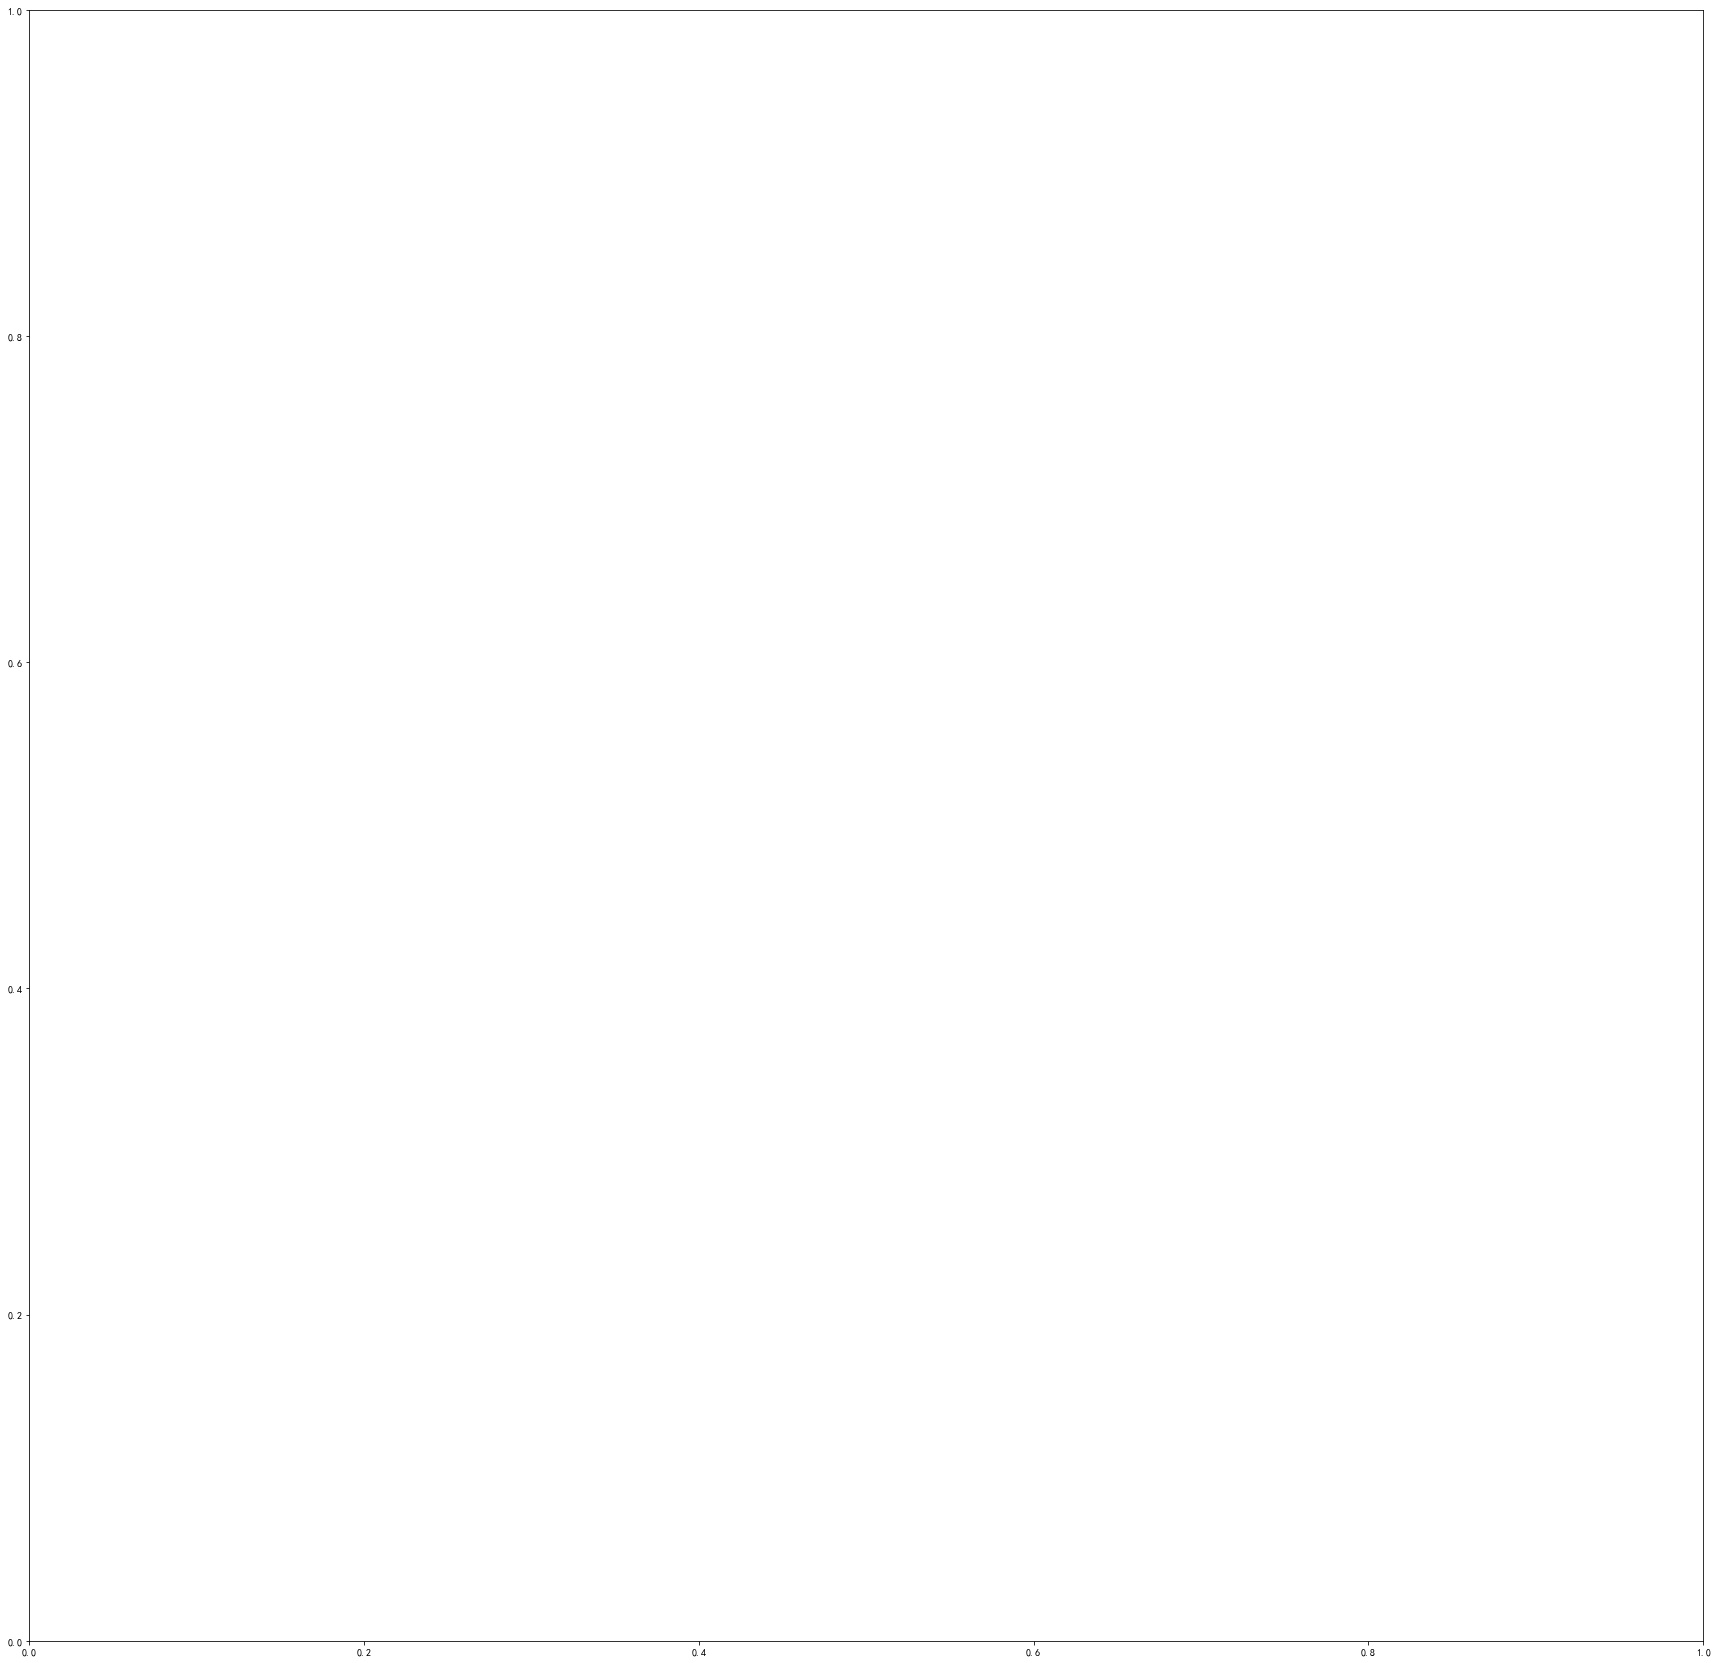

In [55]:
import numpy as np
reduce_dimensions(model,plot_in_notebook = True)